In [1]:
import math
import xarray as xr
import cartopy.crs as crs
import matplotlib as mpl
from matplotlib import pyplot as plt 
import matplotlib.pylab as plt
import matplotlib.path as mpath
from matplotlib.pyplot import figure
import numpy as np
import cartopy.feature as cfeature
from matplotlib.cm import get_cmap
import pyproj
import utm
import pandas as pd 
import traceback 
from pathlib import Path  
import os  
import numpy.ma as ma
import netCDF4 as nc
from netCDF4 import Dataset
import glob
import datetime as dt
import metpy.calc as mpcalc
from metpy.units import units
from metpy.cbook import get_test_data
from metpy.io import metar
from metpy.plots.declarative import (BarbPlot, ContourPlot, FilledContourPlot, MapPanel,
                                     PanelContainer, PlotObs)
from netCDF4 import date2num,num2date
import wrf
from wrf import (getvar, interplevel, to_np, latlon_coords, get_cartopy,
                 cartopy_xlim, cartopy_ylim)
from wrf import getvar, interplevel, to_np, get_basemap, latlon_coords
from wrf import getvar, xy, interp2dxy
from wrf import to_np, getvar, CoordPair, vertcross
from matplotlib.cm import get_cmap
#from cartopy.feature import NaturalEarthFeature
from matplotlib.ticker import (NullFormatter, ScalarFormatter)


In [2]:
#CURRENT DATA
cur_wrfout6 = Dataset('CUR_wrfout_d03_2018-03-25_06_00_00')
'''
cur_wrfout7 = Dataset('CUR_wrfout_d03_2018-03-25_07_00_00')
cur_wrfout8 = Dataset('CUR_wrfout_d03_2018-03-25_08_00_00')
cur_wrfout9 = Dataset('CUR_wrfout_d03_2018-03-25_09_00_00')
cur_wrfout10 = Dataset('CUR_wrfout_d03_2018-03-25_10_00_00')
cur_wrfout11= Dataset('CUR_wrfout_d03_2018-03-25_11_00_00')
cur_wrfout12 = Dataset('CUR_wrfout_d03_2018-03-25_12_00_00')
cur_wrfout13= Dataset('CUR_wrfout_d03_2018-03-25_13_00_00')
cur_wrfout14= Dataset('CUR_wrfout_d03_2018-03-25_14_00_00')
cur_wrfout15= Dataset('CUR_wrfout_d03_2018-03-25_15_00_00')
cur_wrfout16 = Dataset('CUR_wrfout_d03_2018-03-25_16_00_00')
cur_wrfout17= Dataset('CUR_wrfout_d03_2018-03-25_17_00_00')
cur_wrfout18= Dataset('CUR_wrfout_d03_2018-03-25_18_00_00')
cur_wrfout19= Dataset('CUR_wrfout_d03_2018-03-25_19_00_00')
cur_wrfout20 = Dataset('CUR_wrfout_d03_2018-03-25_20_00_00')
cur_wrfout21= Dataset('CUR_wrfout_d03_2018-03-25_21_00_00')
cur_wrfout22= Dataset('CUR_wrfout_d03_2018-03-25_22_00_00')
cur_wrfout23= Dataset('CUR_wrfout_d03_2018-03-25_23_00_00')
'''

"\ncur_wrfout7 = Dataset('CUR_wrfout_d03_2018-03-25_07_00_00')\ncur_wrfout8 = Dataset('CUR_wrfout_d03_2018-03-25_08_00_00')\ncur_wrfout9 = Dataset('CUR_wrfout_d03_2018-03-25_09_00_00')\ncur_wrfout10 = Dataset('CUR_wrfout_d03_2018-03-25_10_00_00')\ncur_wrfout11= Dataset('CUR_wrfout_d03_2018-03-25_11_00_00')\ncur_wrfout12 = Dataset('CUR_wrfout_d03_2018-03-25_12_00_00')\ncur_wrfout13= Dataset('CUR_wrfout_d03_2018-03-25_13_00_00')\ncur_wrfout14= Dataset('CUR_wrfout_d03_2018-03-25_14_00_00')\ncur_wrfout15= Dataset('CUR_wrfout_d03_2018-03-25_15_00_00')\ncur_wrfout16 = Dataset('CUR_wrfout_d03_2018-03-25_16_00_00')\ncur_wrfout17= Dataset('CUR_wrfout_d03_2018-03-25_17_00_00')\ncur_wrfout18= Dataset('CUR_wrfout_d03_2018-03-25_18_00_00')\ncur_wrfout19= Dataset('CUR_wrfout_d03_2018-03-25_19_00_00')\ncur_wrfout20 = Dataset('CUR_wrfout_d03_2018-03-25_20_00_00')\ncur_wrfout21= Dataset('CUR_wrfout_d03_2018-03-25_21_00_00')\ncur_wrfout22= Dataset('CUR_wrfout_d03_2018-03-25_22_00_00')\ncur_wrfout23= Dat

In [14]:
#SST DATA
'''
sst_wrfout6 = Dataset('SST_wrfout_d03_2018-03-25_06_00_00')
sst_wrfout7 = Dataset('SST_wrfout_d03_2018-03-25_07_00_00')
sst_wrfout8 = Dataset('SST_wrfout_d03_2018-03-25_08_00_00')
sst_wrfout9 = Dataset('SST_wrfout_d03_2018-03-25_09_00_00')
sst_wrfout10 = Dataset('SST_wrfout_d03_2018-03-25_10_00_00')
sst_wrfout11 = Dataset('SST_wrfout_d03_2018-03-25_11_00_00')
sst_wrfout12 = Dataset('SST_wrfout_d03_2018-03-25_12_00_00')
sst_wrfout13 = Dataset('SST_wrfout_d03_2018-03-25_13_00_00')
sst_wrfout14 = Dataset('SST_wrfout_d03_2018-03-25_14_00_00')
sst_wrfout15 = Dataset('SST_wrfout_d03_2018-03-25_15_00_00')
sst_wrfout16 = Dataset('SST_wrfout_d03_2018-03-25_16_00_00')
sst_wrfout17 = Dataset('SST_wrfout_d03_2018-03-25_17_00_00')
sst_wrfout18 = Dataset('SST_wrfout_d03_2018-03-25_18_00_00')
sst_wrfout19 = Dataset('SST_wrfout_d03_2018-03-25_19_00_00')
sst_wrfout20 = Dataset('SST_wrfout_d03_2018-03-25_20_00_00')
sst_wrfout21 = Dataset('SST_wrfout_d03_2018-03-25_21_00_00')
sst_wrfout22 = Dataset('SST_wrfout_d03_2018-03-25_22_00_00')
sst_wrfout23 = Dataset('SST_wrfout_d03_2018-03-25_23_00_00')
'''

"\nsst_wrfout6 = Dataset('SST_wrfout_d03_2018-03-25_06_00_00')\nsst_wrfout7 = Dataset('SST_wrfout_d03_2018-03-25_07_00_00')\nsst_wrfout8 = Dataset('SST_wrfout_d03_2018-03-25_08_00_00')\nsst_wrfout9 = Dataset('SST_wrfout_d03_2018-03-25_09_00_00')\nsst_wrfout10 = Dataset('SST_wrfout_d03_2018-03-25_10_00_00')\nsst_wrfout11 = Dataset('SST_wrfout_d03_2018-03-25_11_00_00')\nsst_wrfout12 = Dataset('SST_wrfout_d03_2018-03-25_12_00_00')\nsst_wrfout13 = Dataset('SST_wrfout_d03_2018-03-25_13_00_00')\nsst_wrfout14 = Dataset('SST_wrfout_d03_2018-03-25_14_00_00')\nsst_wrfout15 = Dataset('SST_wrfout_d03_2018-03-25_15_00_00')\nsst_wrfout16 = Dataset('SST_wrfout_d03_2018-03-25_16_00_00')\nsst_wrfout17 = Dataset('SST_wrfout_d03_2018-03-25_17_00_00')\nsst_wrfout18 = Dataset('SST_wrfout_d03_2018-03-25_18_00_00')\nsst_wrfout19 = Dataset('SST_wrfout_d03_2018-03-25_19_00_00')\nsst_wrfout20 = Dataset('SST_wrfout_d03_2018-03-25_20_00_00')\nsst_wrfout21 = Dataset('SST_wrfout_d03_2018-03-25_21_00_00')\nsst_wrfou

# print(wrfout6.variables)
#print('eta levels: ', sstRun_6.ZNU.values, '\neta shape: ', sstRun_6.ZNU.shape)
#print('sfc = 9.96907353e-01', sstRun_6.ZNU[0,0], 'PBL = 9.58004236e-01', sstRun_6.ZNU[0,5], 'free atmo = 5.52296400e-01', sstRun_6.ZNU[0,26])

In [3]:
xlat =getvar(cur_wrfout6, "XLAT")
xlon = getvar(cur_wrfout6, "XLONG")
#xlatu = getvar(wrfout8, "XLAT_U")
#xlonu =getvar(wrfout8, "XLONG_U")
#xlatv = getvar(wrfout8, "XLAT_V")
#xlonv = getvar(wrfout8, "XLONG_V")
print(xlon.shape)
#print(xlon[:,246])

#lon: -90.75 to -87.75
#lat: 25.75 to 27.75

#print(xlon[400,:])
print('xlon[0,1]-xlon[0,0]: ', xlon[0,1]-xlon[0,0])
print('xlon[1,0]-xlon[0,0]: ', xlon[1,0]-xlon[0,0])
print('xlat[0,1]-xlat[0,0]: ', xlat[0,1]-xlat[0,0])
print('xlat[1,0]-xlat[0,0]', xlat[1,0]-xlat[0,0])

#DS25v6_test1_In = np.where(lon25_6 >= min_lon)
#DS25v6_test2_In = np.where(lon25_6 <= max_lon)
#DS25v6_inter_like_lon = np.intersect1d(DS25v6_test1_In, DS25v6_test2_In)

xlon1 = np.where(xlon[400,:]>=-90.70) 
xlon2 = np.where(xlon[400,:]<=-88.0)
lon_int = np.intersect1d(xlon1, xlon2)
#print('lon intersection: ', lon_int, '\nshape: ', lon_int.shape)

#print('\nxlat: ', xlat)
xlat1 = np.where(xlat[:,400]>=26.0)
xlat2 = np.where(xlat[:,400]<=27.70)
lat_int = np.intersect1d(xlat1, xlat2)
#print('\nlat intersection: ', lat_int, '\nshape: ', lat_int.shape)
#put in lon_int and lat_int for speed/vector plot


(474, 639)
xlon[0,1]-xlon[0,0]:  <xarray.DataArray 'XLONG' ()>
array(0.00985718, dtype=float32)
Coordinates:
    Time     datetime64[ns] 2018-03-25T06:00:00
xlon[1,0]-xlon[0,0]:  <xarray.DataArray 'XLONG' ()>
array(-0.00024414, dtype=float32)
Coordinates:
    Time     datetime64[ns] 2018-03-25T06:00:00
xlat[0,1]-xlat[0,0]:  <xarray.DataArray 'XLAT' ()>
array(0.00021362, dtype=float32)
Coordinates:
    Time     datetime64[ns] 2018-03-25T06:00:00
xlat[1,0]-xlat[0,0] <xarray.DataArray 'XLAT' ()>
array(0.0089798, dtype=float32)
Coordinates:
    Time     datetime64[ns] 2018-03-25T06:00:00


In [4]:
#WINDS from CURRENT DATA

#Not staggered
#U10
cur_u10_6 = getvar(cur_wrfout6, "U10")
'''
cur_u10_7 = getvar(cur_wrfout7, "U10")
cur_u10_8 = getvar(cur_wrfout8, "U10")
cur_u10_9 = getvar(cur_wrfout9, "U10")
cur_u10_10 = getvar(cur_wrfout10, "U10")
cur_u10_11 = getvar(cur_wrfout11, "U10")
cur_u10_12 = getvar(cur_wrfout12, "U10")
cur_u10_13 = getvar(cur_wrfout13, "U10")
cur_u10_14 = getvar(cur_wrfout14, "U10")
cur_u10_15 = getvar(cur_wrfout15, "U10")
cur_u10_16 = getvar(cur_wrfout16, "U10")
cur_u10_17 = getvar(cur_wrfout17, "U10")
cur_u10_18 = getvar(cur_wrfout18, "U10")
cur_u10_19 = getvar(cur_wrfout19, "U10")
cur_u10_20 = getvar(cur_wrfout20, "U10")
cur_u10_21 = getvar(cur_wrfout21, "U10")
cur_u10_22 = getvar(cur_wrfout22, "U10")
cur_u10_23 = getvar(cur_wrfout23, "U10")
print('u10 shape: ', cur_u10_19.shape)
'''
#V10
cur_v10_6 = getvar(cur_wrfout6, "V10")
'''
cur_v10_7 = getvar(cur_wrfout7, "V10")
cur_v10_8 = getvar(cur_wrfout8, "V10")
cur_v10_9 = getvar(cur_wrfout9, "V10")
cur_v10_10 = getvar(cur_wrfout10, "V10")
cur_v10_11 = getvar(cur_wrfout11, "V10")
cur_v10_12 = getvar(cur_wrfout12, "V10")
cur_v10_13 = getvar(cur_wrfout13, "V10")
cur_v10_14 = getvar(cur_wrfout14, "V10")
cur_v10_15 = getvar(cur_wrfout15, "V10")
cur_v10_16 = getvar(cur_wrfout16, "V10")
cur_v10_17 = getvar(cur_wrfout17, "V10")
cur_v10_18 = getvar(cur_wrfout18, "V10")
cur_v10_19 = getvar(cur_wrfout19, "V10")
cur_v10_20 = getvar(cur_wrfout20, "V10")
cur_v10_21 = getvar(cur_wrfout21, "V10")
cur_v10_22 = getvar(cur_wrfout22, "V10")
cur_v10_23 = getvar(cur_wrfout23, "V10")
print('v10 shape: ', cur_v10_10.shape)
'''
#speed 10m
cur_speed10_6 = np.sqrt((cur_u10_6**2) + (cur_v10_6**2))
'''
cur_speed10_7 = np.sqrt((cur_u10_7**2) + (cur_v10_7**2))
cur_speed10_8 = np.sqrt((cur_u10_8**2) + (cur_v10_8**2))
cur_speed10_9 = np.sqrt((cur_u10_9**2) + (cur_v10_9**2))
cur_speed10_10 = np.sqrt((cur_u10_10**2) + (cur_v10_10**2))
cur_speed10_11 = np.sqrt((cur_u10_11**2) + (cur_v10_11**2))
cur_speed10_12 = np.sqrt((cur_u10_12**2) + (cur_v10_12**2))
cur_speed10_13 = np.sqrt((cur_u10_13**2) + (cur_v10_13**2))
cur_speed10_14 = np.sqrt((cur_u10_14**2) + (cur_v10_14**2))
cur_speed10_15 = np.sqrt((cur_u10_15**2) + (cur_v10_15**2))
cur_speed10_16 = np.sqrt((cur_u10_16**2) + (cur_v10_16**2))
cur_speed10_17 = np.sqrt((cur_u10_17**2) + (cur_v10_17**2))
cur_speed10_18 = np.sqrt((cur_u10_18**2) + (cur_v10_18**2))
cur_speed10_19 = np.sqrt((cur_u10_19**2) + (cur_v10_19**2))
cur_speed10_20 = np.sqrt((cur_u10_20**2) + (cur_v10_20**2))
cur_speed10_21 = np.sqrt((cur_u10_21**2) + (cur_v10_21**2))
cur_speed10_22 = np.sqrt((cur_u10_22**2) + (cur_v10_22**2))
cur_speed10_23 = np.sqrt((cur_u10_23**2) + (cur_v10_23**2))
print('speed10 shape: ', cur_speed10_12.shape)
'''
#Staggered
cur_uwind6 = getvar(cur_wrfout6, "U")
cur_vwind6 = getvar(cur_wrfout6, 'V')
'''
cur_uwind7 = getvar(cur_wrfout7, "U")
cur_vwind7 = getvar(cur_wrfout7, 'V')
cur_uwind8 = getvar(cur_wrfout8, "U")
cur_vwind8 = getvar(cur_wrfout8, 'V')
cur_uwind9 = getvar(cur_wrfout9, "U")
cur_vwind9 = getvar(cur_wrfout9, 'V')
cur_uwind10 = getvar(cur_wrfout10, "U")
cur_vwind10 = getvar(cur_wrfout10, 'V')
cur_uwind11 = getvar(cur_wrfout11, "U")
cur_vwind11 = getvar(cur_wrfout11, 'V')
cur_uwind12 = getvar(cur_wrfout12, "U")
cur_vwind12 = getvar(cur_wrfout12, 'V')
cur_uwind13 = getvar(cur_wrfout13, "U")
cur_vwind13 = getvar(cur_wrfout13, 'V')
cur_uwind14 = getvar(cur_wrfout14, "U")
cur_vwind14 = getvar(cur_wrfout14, 'V')
cur_uwind15 = getvar(cur_wrfout15, "U")
cur_vwind15 = getvar(cur_wrfout15, 'V')
cur_uwind16 = getvar(cur_wrfout16, "U")
cur_vwind16 = getvar(cur_wrfout16, 'V')
cur_uwind17 = getvar(cur_wrfout17, "U")
cur_vwind17 = getvar(cur_wrfout17, 'V')
cur_uwind18 = getvar(cur_wrfout18, "U")
cur_vwind18 = getvar(cur_wrfout18, 'V')
cur_uwind19 = getvar(cur_wrfout19, "U")
cur_vwind19 = getvar(cur_wrfout19, 'V')
cur_uwind20 = getvar(cur_wrfout20, "U")
cur_vwind20 = getvar(cur_wrfout20, 'V')
cur_uwind21 = getvar(cur_wrfout21, "U")
cur_vwind21 = getvar(cur_wrfout21, 'V')
cur_uwind22 = getvar(cur_wrfout22, "U")
cur_vwind22 = getvar(cur_wrfout22, 'V')
cur_uwind23 = getvar(cur_wrfout23, "U")
cur_vwind23 = getvar(cur_wrfout23, 'V')
print('wind comp. shape: ', cur_uwind21.shape)
'''
cur_uwind_destag6 = wrf.destagger(cur_uwind6, stagger_dim = 2)
cur_vwind_destag6 = wrf.destagger(cur_vwind6, stagger_dim = 1)
cur_w_speed6 = np.sqrt((cur_uwind_destag6**2)+(cur_vwind_destag6**2))
'''
cur_uwind_destag7 = wrf.destagger(cur_uwind7, stagger_dim = 2)
cur_vwind_destag7 = wrf.destagger(cur_vwind7, stagger_dim = 1)
cur_w_speed7 = np.sqrt((cur_uwind_destag7**2)+(cur_vwind_destag7**2))
cur_uwind_destag8 = wrf.destagger(cur_uwind8, stagger_dim = 2)
cur_vwind_destag8 = wrf.destagger(cur_vwind8, stagger_dim = 1)
cur_w_speed8 = np.sqrt((cur_uwind_destag8**2)+(cur_vwind_destag8**2))
cur_uwind_destag9 = wrf.destagger(cur_uwind9, stagger_dim = 2)
cur_vwind_destag9 = wrf.destagger(cur_vwind9, stagger_dim = 1)
cur_w_speed9 = np.sqrt((cur_uwind_destag9**2)+(cur_vwind_destag9**2))
cur_uwind_destag10 = wrf.destagger(cur_uwind10, stagger_dim = 2)
cur_vwind_destag10 = wrf.destagger(cur_vwind10, stagger_dim = 1)
cur_w_speed10 = np.sqrt((cur_uwind_destag10**2)+(cur_vwind_destag10**2))
cur_uwind_destag11 = wrf.destagger(cur_uwind11, stagger_dim = 2)
cur_vwind_destag11 = wrf.destagger(cur_vwind11, stagger_dim = 1)
cur_w_speed11 = np.sqrt((cur_uwind_destag11**2)+(cur_vwind_destag11**2))
cur_uwind_destag12 = wrf.destagger(cur_uwind12, stagger_dim = 2)
cur_vwind_destag12 = wrf.destagger(cur_vwind12, stagger_dim = 1)
cur_w_speed12 = np.sqrt((cur_uwind_destag12**2)+(cur_vwind_destag12**2))
cur_uwind_destag13 = wrf.destagger(cur_uwind13, stagger_dim = 2)
cur_vwind_destag13 = wrf.destagger(cur_vwind13, stagger_dim = 1)
cur_w_speed13 = np.sqrt((cur_uwind_destag13**2)+(cur_vwind_destag13**2))
cur_uwind_destag14 = wrf.destagger(cur_uwind14, stagger_dim = 2)
cur_vwind_destag14 = wrf.destagger(cur_vwind14, stagger_dim = 1)
cur_w_speed14 = np.sqrt((cur_uwind_destag14**2)+(cur_vwind_destag14**2))
cur_uwind_destag15 = wrf.destagger(cur_uwind15, stagger_dim = 2)
cur_vwind_destag15 = wrf.destagger(cur_vwind15, stagger_dim = 1)
cur_w_speed15 = np.sqrt((cur_uwind_destag15**2)+(cur_vwind_destag15**2))
cur_uwind_destag16 = wrf.destagger(cur_uwind16, stagger_dim = 2)
cur_vwind_destag16 = wrf.destagger(cur_vwind16, stagger_dim = 1)
cur_w_speed16 = np.sqrt((cur_uwind_destag16**2)+(cur_vwind_destag16**2))
cur_uwind_destag17 = wrf.destagger(cur_uwind17, stagger_dim = 2)
cur_vwind_destag17 = wrf.destagger(cur_vwind17, stagger_dim = 1)
cur_w_speed17 = np.sqrt((cur_uwind_destag17**2)+(cur_vwind_destag17**2))
cur_uwind_destag18 = wrf.destagger(cur_uwind18, stagger_dim = 2)
cur_vwind_destag18 = wrf.destagger(cur_vwind18, stagger_dim = 1)
cur_w_speed18 = np.sqrt((cur_uwind_destag18**2)+(cur_vwind_destag18**2))
cur_uwind_destag19 = wrf.destagger(cur_uwind19, stagger_dim = 2)
cur_vwind_destag19 = wrf.destagger(cur_vwind19, stagger_dim = 1)
cur_w_speed19 = np.sqrt((cur_uwind_destag19**2)+(cur_vwind_destag19**2))
cur_uwind_destag20 = wrf.destagger(cur_uwind20, stagger_dim = 2)
cur_vwind_destag20 = wrf.destagger(cur_vwind20, stagger_dim = 1)
cur_w_speed20 = np.sqrt((cur_uwind_destag20**2)+(cur_vwind_destag20**2))
cur_uwind_destag21 = wrf.destagger(cur_uwind21, stagger_dim = 2)
cur_vwind_destag21 = wrf.destagger(cur_vwind21, stagger_dim = 1)
cur_w_speed21 = np.sqrt((cur_uwind_destag21**2)+(cur_vwind_destag21**2))
cur_uwind_destag22 = wrf.destagger(cur_uwind22, stagger_dim = 2)
cur_vwind_destag22 = wrf.destagger(cur_vwind22, stagger_dim = 1)
cur_w_speed22 = np.sqrt((cur_uwind_destag22**2)+(cur_vwind_destag22**2))
cur_uwind_destag23 = wrf.destagger(cur_uwind23, stagger_dim = 2)
cur_vwind_destag23 = wrf.destagger(cur_vwind23, stagger_dim = 1)
cur_w_speed23 = np.sqrt((cur_uwind_destag23**2)+(cur_vwind_destag23**2))
print('destag wind speed shape: ', cur_w_speed15.shape)
'''

"\ncur_uwind_destag7 = wrf.destagger(cur_uwind7, stagger_dim = 2)\ncur_vwind_destag7 = wrf.destagger(cur_vwind7, stagger_dim = 1)\ncur_w_speed7 = np.sqrt((cur_uwind_destag7**2)+(cur_vwind_destag7**2))\ncur_uwind_destag8 = wrf.destagger(cur_uwind8, stagger_dim = 2)\ncur_vwind_destag8 = wrf.destagger(cur_vwind8, stagger_dim = 1)\ncur_w_speed8 = np.sqrt((cur_uwind_destag8**2)+(cur_vwind_destag8**2))\ncur_uwind_destag9 = wrf.destagger(cur_uwind9, stagger_dim = 2)\ncur_vwind_destag9 = wrf.destagger(cur_vwind9, stagger_dim = 1)\ncur_w_speed9 = np.sqrt((cur_uwind_destag9**2)+(cur_vwind_destag9**2))\ncur_uwind_destag10 = wrf.destagger(cur_uwind10, stagger_dim = 2)\ncur_vwind_destag10 = wrf.destagger(cur_vwind10, stagger_dim = 1)\ncur_w_speed10 = np.sqrt((cur_uwind_destag10**2)+(cur_vwind_destag10**2))\ncur_uwind_destag11 = wrf.destagger(cur_uwind11, stagger_dim = 2)\ncur_vwind_destag11 = wrf.destagger(cur_vwind11, stagger_dim = 1)\ncur_w_speed11 = np.sqrt((cur_uwind_destag11**2)+(cur_vwind_des

In [ ]:
#WINDS from SST DATA

#Not staggered
#U10
'''
sst_u10_6 = getvar(sst_wrfout6, "U10")
sst_u10_7 = getvar(sst_wrfout7, "U10")
sst_u10_8 = getvar(sst_wrfout8, "U10")
sst_u10_9 = getvar(sst_wrfout9, "U10")
sst_u10_10 = getvar(sst_wrfout10, "U10")
sst_u10_11 = getvar(sst_wrfout11, "U10")
sst_u10_12 = getvar(sst_wrfout12, "U10")
sst_u10_13 = getvar(sst_wrfout13, "U10")
sst_u10_14 = getvar(sst_wrfout14, "U10")
sst_u10_15 = getvar(sst_wrfout15, "U10")
sst_u10_16 = getvar(sst_wrfout16, "U10")
sst_u10_17 = getvar(sst_wrfout17, "U10")
sst_u10_18 = getvar(sst_wrfout18, "U10")
sst_u10_19 = getvar(sst_wrfout19, "U10")
sst_u10_20 = getvar(sst_wrfout20, "U10")
sst_u10_21 = getvar(sst_wrfout21, "U10")
sst_u10_22 = getvar(sst_wrfout22, "U10")
sst_u10_23 = getvar(sst_wrfout23, "U10")
print('u10 shape: ', sst_u10_19.shape)

#V10
cur_v10_6 = getvar(sst_wrfout6, "V10")
cur_v10_7 = getvar(sst_wrfout7, "V10")
cur_v10_8 = getvar(sst_wrfout8, "V10")
cur_v10_9 = getvar(sst_wrfout9, "V10")
cur_v10_10 = getvar(sst_wrfout10, "V10")
cur_v10_11 = getvar(sst_wrfout11, "V10")
cur_v10_12 = getvar(sst_wrfout12, "V10")
cur_v10_13 = getvar(sst_wrfout13, "V10")
cur_v10_14 = getvar(sst_wrfout14, "V10")
cur_v10_15 = getvar(sst_wrfout15, "V10")
cur_v10_16 = getvar(sst_wrfout16, "V10")
cur_v10_17 = getvar(sst_wrfout17, "V10")
cur_v10_18 = getvar(sst_wrfout18, "V10")
sst_v10_19 = getvar(sst_wrfout19, "V10")
sst_v10_20 = getvar(sst_wrfout20, "V10")
sst_v10_21 = getvar(sst_wrfout21, "V10")
sst_v10_22 = getvar(sst_wrfout22, "V10")
sst_v10_23 = getvar(sst_wrfout23, "V10")
print('v10 shape: ', sst_v10_10.shape)

#speed 10m
sst_speed10_6 = np.sqrt((sst_u10_6**2) + (sst_v10_6**2))
sst_speed10_7 = np.sqrt((sst_u10_7**2) + (sst_v10_7**2))
sst_speed10_8 = np.sqrt((sst_u10_8**2) + (sst_v10_8**2))
sst_speed10_9 = np.sqrt((sst_u10_9**2) + (sst_v10_9**2))
sst_speed10_10 = np.sqrt((sst_u10_10**2) + (sst_v10_10**2))
sst_speed10_11 = np.sqrt((sst_u10_11**2) + (sst_v10_11**2))
sst_speed10_12 = np.sqrt((sst_u10_12**2) + (sst_v10_12**2))
sst_speed10_13 = np.sqrt((sst_u10_13**2) + (sst_v10_13**2))
sst_speed10_14 = np.sqrt((sst_u10_14**2) + (sst_v10_14**2))
sst_speed10_15 = np.sqrt((sst_u10_15**2) + (sst_v10_15**2))
sst_speed10_16 = np.sqrt((sst_u10_16**2) + (sst_v10_16**2))
sst_speed10_17 = np.sqrt((sst_u10_17**2) + (sst_v10_17**2))
sst_speed10_18 = np.sqrt((sst_u10_18**2) + (sst_v10_18**2))
sst_speed10_19 = np.sqrt((sst_u10_19**2) + (sst_v10_19**2))
sst_speed10_20 = np.sqrt((sst_u10_20**2) + (sst_v10_20**2))
sst_speed10_21 = np.sqrt((sst_u10_21**2) + (sst_v10_21**2))
sst_speed10_22 = np.sqrt((sst_u10_22**2) + (sst_v10_22**2))
sst_speed10_23 = np.sqrt((sst_u10_23**2) + (sst_v10_23**2))
print('speed10 shape: ', sst_speed10_12.shape)

#Staggered
sst_uwind6 = getvar(sst_wrfout6, "U")
sst_vwind6 = getvar(sst_wrfout6, 'V')
sst_uwind7 = getvar(sst_wrfout7, "U")
sst_vwind7 = getvar(sst_wrfout7, 'V')
sst_uwind8 = getvar(sst_wrfout8, "U")
sst_vwind8 = getvar(sst_wrfout8, 'V')
sst_uwind9 = getvar(sst_wrfout9, "U")
sst_vwind9 = getvar(sst_wrfout9, 'V')
sst_uwind10 = getvar(sst_wrfout10, "U")
sst_vwind10 = getvar(sst_wrfout10, 'V')
sst_uwind11 = getvar(sst_wrfout11, "U")
sst_vwind11 = getvar(sst_wrfout11, 'V')
sst_uwind12 = getvar(sst_wrfout12, "U")
sst_vwind12 = getvar(sst_wrfout12, 'V')
sst_uwind13 = getvar(sst_wrfout13, "U")
sst_vwind13 = getvar(sst_wrfout13, 'V')
sst_uwind14 = getvar(sst_wrfout14, "U")
sst_vwind14 = getvar(sst_wrfout14, 'V')
sst_uwind15 = getvar(sst_wrfout15, "U")
sst_vwind15 = getvar(sst_wrfout15, 'V')
sst_uwind16 = getvar(sst_wrfout16, "U")
sst_vwind16 = getvar(sst_wrfout16, 'V')
sst_uwind17 = getvar(sst_wrfout17, "U")
sst_vwind17 = getvar(sst_wrfout17, 'V')
sst_uwind18 = getvar(sst_wrfout18, "U")
sst_vwind18 = getvar(sst_wrfout18, 'V')
sst_uwind19 = getvar(sst_wrfout19, "U")
sst_vwind19 = getvar(sst_wrfout19, 'V')
sst_uwind20 = getvar(sst_wrfout20, "U")
sst_vwind20 = getvar(sst_wrfout20, 'V')
sst_uwind21 = getvar(sst_wrfout21, "U")
sst_vwind21 = getvar(sst_wrfout21, 'V')
sst_uwind22 = getvar(sst_wrfout22, "U")
sst_vwind22 = getvar(sst_wrfout22, 'V')
sst_uwind23 = getvar(sst_wrfout23, "U")
sst_vwind23 = getvar(sst_wrfout23, 'V')
print('wind comp. shape: ', sst_uwind21.shape)

sst_uwind_destag6 = wrf.destagger(sst_uwind6, stagger_dim = 2)
sst_vwind_destag6 = wrf.destagger(sst_vwind6, stagger_dim = 1)
sst_w_speed6 = np.sqrt((sst_uwind_destag6**2)+(sst_vwind_destag6**2))
sst_uwind_destag7 = wrf.destagger(sst_uwind7, stagger_dim = 2)
sst_vwind_destag7 = wrf.destagger(sst_vwind7, stagger_dim = 1)
sst_w_speed7 = np.sqrt((sst_uwind_destag7**2)+(sst_vwind_destag7**2))
sst_uwind_destag8 = wrf.destagger(sst_uwind8, stagger_dim = 2)
sst_vwind_destag8 = wrf.destagger(sst_vwind8, stagger_dim = 1)
sst_w_speed8 = np.sqrt((sst_uwind_destag8**2)+(sst_vwind_destag8**2))
sst_uwind_destag9 = wrf.destagger(sst_uwind9, stagger_dim = 2)
sst_vwind_destag9 = wrf.destagger(sst_vwind9, stagger_dim = 1)
sst_w_speed9 = np.sqrt((sst_uwind_destag9**2)+(sst_vwind_destag9**2))
sst_uwind_destag10 = wrf.destagger(sst_uwind10, stagger_dim = 2)
sst_vwind_destag10 = wrf.destagger(sst_vwind10, stagger_dim = 1)
sst_w_speed10 = np.sqrt((sst_uwind_destag10**2)+(sst_vwind_destag10**2))
sst_uwind_destag11 = wrf.destagger(sst_uwind11, stagger_dim = 2)
sst_vwind_destag11 = wrf.destagger(sst_vwind11, stagger_dim = 1)
sst_w_speed11 = np.sqrt((sst_uwind_destag11**2)+(sst_vwind_destag11**2))
sst_uwind_destag12 = wrf.destagger(sst_uwind12, stagger_dim = 2)
sst_vwind_destag12 = wrf.destagger(sst_vwind12, stagger_dim = 1)
sst_w_speed12 = np.sqrt((sst_uwind_destag12**2)+(sst_vwind_destag12**2))
sst_uwind_destag13 = wrf.destagger(sst_uwind13, stagger_dim = 2)
sst_vwind_destag13 = wrf.destagger(sst_vwind13, stagger_dim = 1)
sst_w_speed13 = np.sqrt((sst_uwind_destag13**2)+(sst_vwind_destag13**2))
sst_uwind_destag14 = wrf.destagger(sst_uwind14, stagger_dim = 2)
sst_vwind_destag14 = wrf.destagger(sst_vwind14, stagger_dim = 1)
sst_w_speed14 = np.sqrt((sst_uwind_destag14**2)+(sst_vwind_destag14**2))
sst_uwind_destag15 = wrf.destagger(sst_uwind15, stagger_dim = 2)
sst_vwind_destag15 = wrf.destagger(sst_vwind15, stagger_dim = 1)
sst_w_speed15 = np.sqrt((sst_uwind_destag15**2)+(sst_vwind_destag15**2))
sst_uwind_destag16 = wrf.destagger(sst_uwind16, stagger_dim = 2)
sst_vwind_destag16 = wrf.destagger(sst_vwind16, stagger_dim = 1)
sst_w_speed16 = np.sqrt((sst_uwind_destag16**2)+(sst_vwind_destag16**2))
sst_uwind_destag17 = wrf.destagger(sst_uwind17, stagger_dim = 2)
sst_vwind_destag17 = wrf.destagger(sst_vwind17, stagger_dim = 1)
sst_w_speed17 = np.sqrt((sst_uwind_destag17**2)+(sst_vwind_destag17**2))
sst_uwind_destag18 = wrf.destagger(sst_uwind18, stagger_dim = 2)
sst_vwind_destag18 = wrf.destagger(sst_vwind18, stagger_dim = 1)
sst_w_speed18 = np.sqrt((sst_uwind_destag18**2)+(sst_vwind_destag18**2))
sst_uwind_destag19 = wrf.destagger(sst_uwind19, stagger_dim = 2)
sst_vwind_destag19 = wrf.destagger(sst_vwind19, stagger_dim = 1)
sst_w_speed19 = np.sqrt((sst_uwind_destag19**2)+(sst_vwind_destag19**2))
sst_uwind_destag20 = wrf.destagger(sst_uwind20, stagger_dim = 2)
sst_vwind_destag20 = wrf.destagger(sst_vwind20, stagger_dim = 1)
sst_w_speed20 = np.sqrt((sst_uwind_destag20**2)+(sst_vwind_destag20**2))
sst_uwind_destag21 = wrf.destagger(sst_uwind21, stagger_dim = 2)
sst_vwind_destag21 = wrf.destagger(sst_vwind21, stagger_dim = 1)
sst_w_speed21 = np.sqrt((sst_uwind_destag21**2)+(sst_vwind_destag21**2))
sst_uwind_destag22 = wrf.destagger(sst_uwind22, stagger_dim = 2)
sst_vwind_destag22 = wrf.destagger(sst_vwind22, stagger_dim = 1)
sst_w_speed22 = np.sqrt((sst_uwind_destag22**2)+(sst_vwind_destag22**2))
sst_uwind_destag23 = wrf.destagger(sst_uwind23, stagger_dim = 2)
sst_vwind_destag23 = wrf.destagger(sst_vwind23, stagger_dim = 1)
sst_w_speed23 = np.sqrt((sst_uwind_destag23**2)+(sst_vwind_destag23**2))
print('destag wind speed shape: ', sst_w_speed15.shape)
'''

In [5]:
#reshape lat lon array
new_lon = [xlon[400][x] for x in lon_int] #(265, 474)
new_lat = [xlat[x][400] for x in lat_int] #(189, 639)

print('new lon: ', np.array(new_lon).shape)
print('new lat: ', np.array(new_lat).shape)

new lon:  (265,)
new lat:  (189,)


In [ ]:
#reshape  SST 10m wind speed, 10mU, 10mV 
'''
#10m speed 
new_sst_speed10_6 = []
for y in lat_int:
    inner_array_sst6 = []
    for x in lon_int:
        inner_array_sst6.append(sst_speed10_6[y][x])
    new_sst_speed10_6.append(inner_array_sst6)
print('sst 10m speed6: ', np.array(new_sst_speed10_6).shape) #(189, 265)
new_sst_speed10_6 = np.array(new_sst_speed10_6)

new_sst_speed10_7 = []
for y in lat_int:
    inner_array_sst7 = []
    for x in lon_int:
        inner_array_sst7.append(sst_speed10_7[y][x])
    new_sst_speed10_7.append(inner_array_sst7)
print('sst 10m speed7: ', np.array(new_speed10_7).shape) #(189, 265)
new_sst_speed10_7 = np.array(new_sst_speed10_7)

new_sst_speed10_8 = []
for y in lat_int:
    inner_array_sst8 = []
    for x in lon_int:
        inner_array_sst8.append(sst_speed10_8[y][x])
    new_sst_speed10_8.append(inner_array_sst8)
new_sst_speed10_8 = np.array(new_sst_speed10_8)

new_sst_speed10_9 = []
for y in lat_int:
    inner_array_sst9 = []
    for x in lon_int:
        inner_array_sst9.append(sst_speed10_9[y][x])
    new_sst_speed10_9.append(inner_array_sst9)
new_sst_speed10_9 = np.array(new_sst_speed10_9)

new_sst_speed10_10 = []
for y in lat_int:
    inner_array_sst9 = []
    for x in lon_int:
        inner_array_sst9.append(sst_speed10_9[y][x])
    new_sst_speed10_9.append(inner_array_sst9)
new_sst_speed10_9 = np.array(new_sst_speed10_9)

new_sst_speed10_11 = []
for y in lat_int:
    inner_array_sst11 = []
    for x in lon_int:
        inner_array11.append(sst_speed10_11[y][x])
    new_sst_speed10_11.append(inner_array_sst11)
new_sst_speed10_11 = np.array(new_sst_speed10_11)

new_sst_speed10_12 = []
for y in lat_int:
    inner_array_sst12 = []
    for x in lon_int:
        inner_array_sst12.append(sst_speed10_12[y][x])
    new_sst_speed10_12.append(inner_array_sst12)
new_sst_speed10_12 = np.array(new_sst_speed10_12)

new_sst_speed10_13 = []
for y in lat_int:
    inner_array_sst13 = []
    for x in lon_int:
        inner_array_sst13.append(sst_speed10_13[y][x])
    new_sst_speed10_13.append(inner_array_sst13)
new_sst_speed10_13 = np.array(new_sst_speed10_13)
    
new_sst_speed10_14 = []
for y in lat_int:
    inner_array_sst14 = []
    for x in lon_int:
        inner_array_sst14.append(sst_speed10_14[y][x])
    new_sst_speed10_14.append(inner_array_sst14)
new_sst_speed10_14 = np.array(new_sst_speed10_14)

new_sst_speed10_15 = []
for y in lat_int:
    inner_array_sst15 = []
    for x in lon_int:
        inner_array_sst15.append(sst_speed10_15[y][x])
    new_sst_speed10_15.append(inner_array_sst15)
new_sst_speed10_15 = np.array(new_sst_speed10_15)

new_sst_speed10_16 = []
for y in lat_int:
    inner_array_sst16 = []
    for x in lon_int:
        inner_array_sst16.append(sst_speed10_16[y][x])
    new_sst_speed10_16.append(inner_array_sst16)
new_sst_speed10_16 = np.array(new_sst_speed10_16)

new_sst_speed10_16 = []
for y in lat_int:
    inner_array_sst16 = []
    for x in lon_int:
        inner_array_sst16.append(sst_speed10_16[y][x])
    new_sst_speed10_16.append(inner_array_sst16)
new_sst_speed10_16 = np.array(new_sst_speed10_16)

new_sst_speed10_17 = []
for y in lat_int:
    inner_array_sst17 = []
    for x in lon_int:
        inner_array_sst17.append(sst_speed10_17[y][x])
    new_sst_speed10_17.append(inner_array_sst17)
new_sst_speed10_17 = np.array(new_sst_speed10_17)

new_sst_speed10_18 = []
for y in lat_int:
    inner_array_sst18 = []
    for x in lon_int:
        inner_array_sst18.append(sst_speed10_18[y][x])
    new_sst_speed10_18.append(inner_array_sst18)
new_sst_speed10_18 = np.array(new_sst_speed10_18)

new_sst_speed10_19 = []
for y in lat_int:
    inner_array_sst19 = []
    for x in lon_int:
        inner_array_sst19.append(sst_speed10_19[y][x])
    new_sst_speed10_19.append(inner_array_sst19)
new_sst_speed10_19 = np.array(new_sst_speed10_19)
    
new_sst_speed10_20 = []
for y in lat_int:
    inner_array_sst20 = []
    for x in lon_int:
        inner_array_sst20.append(sst_speed10_20[y][x])
    new_sst_speed10_20.append(inner_array_sst20)
new_sst_speed10_20 = np.array(new_sst_speed10_20)

new_sst_speed10_21 = []
for y in lat_int:
    inner_array_sst21 = []
    for x in lon_int:
        inner_array_sst21.append(sst_speed10_21[y][x])
    new_sst_speed10_21.append(inner_array_sst21)
new_sst_speed10_21 = np.array(new_sst_speed10_21)

new_sst_speed10_22 = []
for y in lat_int:
    inner_array_sst22 = []
    for x in lon_int:
        inner_array_sst22.append(sst_speed10_22[y][x])
    new_sst_speed10_22.append(inner_array_sst22)
new_sst_speed10_22 = np.array(new_sst_speed10_22)

new_sst_speed10_23 = []
for y in lat_int:
    inner_array_sst23 = []
    for x in lon_int:
        inner_array_sst23.append(sst_speed10_23[y][x])
    new_sst_speed10_23.append(inner_array_sst23)
new_sst_speed10_23 = np.array(new_sst_speed10_23)
    
    
    
    
#10mU & 10mV     
new_sst_u10_6 = [] 
for y in lat_int:
    sst_u6_inner_array = []
    for x in lon_int:
        sst_u6_inner_array.append(sst_u10_6[y][x])
    new_sst_u10_6.append(sst_u6_inner_array)
new_sst_u10_6 =np.array(new_sst_u10_6)
print(new_sst_u10_6.shape)

new_sst_v10_6 = []
for y in lat_int:
    sst_v6_inner_array = []
    for x in lon_int:
        sst_v6_inner_array.append(sst_v10_6[y][x])
    new_sst_v10_6.append(ss_v6_inner_array)
new_sst_v10_6 =np.array(new_sst_v10_6)
print(new_sst_v10_6.shape)
    

    
    
    
    

#U, V 
new_sst_uwind_6 = [] 
for y in lat_int:
    sst_uwind6_inner_array = []
    for x in lon_int:
        sst_uwind6_inner_array.append(sst_uwind_6[y][x])
    new_sst_uwind_6.append(sst_uwind6_inner_array)
new_sst_uwind_6 =np.array(new_sst_uwind_6)
print(new_sst_uwind_6.shape)

new_sst_vwind_6 = [] 
for y in lat_int:
    sst_vwind6_inner_array = []
    for x in lon_int:
        sst_vwind6_inner_array.append(sst_vwind_6[y][x])
    new_sst_vwind_6.append(sst_vwind6_inner_array)
new_sst_vwind_6 =np.array(new_sst_vwind_6)
print(new_sst_vwind_6.shape)







#Speed
new_sst_wspeed_6 = [] 
for y in lat_int:
    sst_wspeed_inner_array = []
    for x in lon_int:
        sst_wspeed_inner_array.append(sst_wspeed_6[y][x])
    new_sst_wspeed_6.append(sst_wspeed_inner_array)
new_sst_wspeed_6 =np.array(new_sst_wspeed_6)
print(new_sst_wspeed_6.shape)





'''


In [6]:
#reshape CURRENT 10m wind speed, 10mU, 10mV 

#10m speed 
new_cur_speed10_6 = []
for y in lat_int:
    inner_array_cur6 = []
    for x in lon_int:
        inner_array_cur6.append(cur_speed10_6[y][x])
    new_cur_speed10_6.append(inner_array_cur6)
print('cur 10m speed6: ', np.array(new_cur_speed10_6).shape) #(189, 265)
new_cur_speed10_6 = np.array(new_cur_speed10_6)


#10mU & 10mV     
new_cur_u10_6 = [] 
for y in lat_int:
    cur_u6_inner_array = []
    for x in lon_int:
        cur_u6_inner_array.append(cur_u10_6[y][x])
    new_cur_u10_6.append(cur_u6_inner_array)
new_cur_u10_6 =np.array(new_cur_u10_6)
print(new_cur_u10_6.shape)

new_cur_v10_6 = []
for y in lat_int:
    cur_v6_inner_array = []
    for x in lon_int:
        cur_v6_inner_array.append(cur_v10_6[y][x])
    new_cur_v10_6.append(cur_v6_inner_array)
new_cur_v10_6 =np.array(new_cur_v10_6)
print(new_cur_v10_6.shape)


'''
#U, V 
new_cur_uwind_6 = [] 
for y in lat_int:
    cur_uwind6_inner_array = []
    for x in lon_int:
        cur_uwind6_inner_array.append(cur_uwind6[y][x])
    new_cur_uwind_6.append(cur_uwind6_inner_array)
new_cur_uwind_6 =np.array(new_cur_uwind_6)
print(new_cur_uwind_6.shape)

new_cur_vwind_6 = [] 
for y in lat_int:
    cur_vwind6_inner_array = []
    for x in lon_int:
        cur_vwind6_inner_array.append(cur_vwind6[y][x])
    new_cur_vwind_6.append(cur_vwind6_inner_array)
new_cur_vwind_6 =np.array(new_cur_vwind_6)
print(new_cur_vwind_6.shape)

#Speed
new_cur_wspeed_6 = [] 
for y in lat_int:
    cur_wspeed_inner_array = []
    for x in lon_int:
        cur_wspeed_inner_array.append(cur_wspeed6[y][x])
    new_cur_wspeed_6.append(cur_wspeed_inner_array)
new_cur_wspeed_6 =np.array(new_cur_wspeed_6)
print(new_cur_wspeed_6.shape)
'''


cur 10m speed6:  (189, 265)
(189, 265)
(189, 265)


'\n#U, V \nnew_cur_uwind_6 = [] \nfor y in lat_int:\n    cur_uwind6_inner_array = []\n    for x in lon_int:\n        cur_uwind6_inner_array.append(cur_uwind6[y][x])\n    new_cur_uwind_6.append(cur_uwind6_inner_array)\nnew_cur_uwind_6 =np.array(new_cur_uwind_6)\nprint(new_cur_uwind_6.shape)\n\nnew_cur_vwind_6 = [] \nfor y in lat_int:\n    cur_vwind6_inner_array = []\n    for x in lon_int:\n        cur_vwind6_inner_array.append(cur_vwind6[y][x])\n    new_cur_vwind_6.append(cur_vwind6_inner_array)\nnew_cur_vwind_6 =np.array(new_cur_vwind_6)\nprint(new_cur_vwind_6.shape)\n\n#Speed\nnew_cur_wspeed_6 = [] \nfor y in lat_int:\n    cur_wspeed_inner_array = []\n    for x in lon_int:\n        cur_wspeed_inner_array.append(cur_wspeed6[y][x])\n    new_cur_wspeed_6.append(cur_wspeed_inner_array)\nnew_cur_wspeed_6 =np.array(new_cur_wspeed_6)\nprint(new_cur_wspeed_6.shape)\n'

In [7]:
#get theta
pert_t6 =getvar(cur_wrfout6, 'T')
ref_t6 =getvar(cur_wrfout6, 'T00')
theta_6 = getvar(cur_wrfout6, "theta")

#reshape theta
new_theta_6 = []
for y in lat_int:
    theta6_inner_array = []
    for x in lon_int:
        theta6_inner_array.append(theta_6[y][x])
    new_theta_6.append(v6_inner_array)
new_theta_6 =np.array(new_theta_6)
print(new_theta_6.shape)

#get temp.
pert_p6 = getvar(cur_wrfout6, 'P')
base_p6 = getvar(cur_wrfout6, 'P00')
full_p6 = pert_p6 + base_p6
temp6 = wrf.tk(full_p6, full_t6, meta=True, units='K')
'''
#reshape temp
new_temp_6 = [] 
for y in lat_int:
    temp6_inner_array = []
    for x in lon_int:
        temp6_inner_array.append(temp_6[y][x])
    new_temp_6.append(temp6_inner_array)
new_temp_6 =np.array(new_temp_6)
print(new_temp_6.shape)

#get virtual temp
Tv6 = wrf.tvirtual(temp6, qv_6, meta=True, units='K')
#reshape Tv
new_tv_6 = [] 
for y in lat_int:
    tv6_inner_array = []
    for x in lon_int:
        tv6_inner_array.append(Tv6[y][x])
    new_tv_6.append(tv6_inner_array)
new_tv_6 =np.array(new_tv_6)
print(new_tv_6.shape)

#get qv
qv_6 = getvar(cur_wrfout6, "QVAPOR")
#reshape qv
new_qv_6 = [] 
for y in lat_int:
    qv_inner_array = []
    for x in lon_int:
        qv6_inner_array.append(qv_6[y][x])
    new_qv_6.append(qv6_inner_array)
new_qv_6 =np.array(new_qv_6)
print(new_qv_6.shape)

#w
w_6 = getvar(cur_wrfout6, "W")
#reshape w 
new_w_6 = [] 
for y in lat_int:
    w6_inner_array = []
    for x in lon_int:
        w6_inner_array.append(w_6[y][x])
    new_w_6.append(w6_inner_array)
new_w_6 =np.array(new_w_6)
print(new_w_6.shape)
'''


IndexError: index 180 is out of bounds for axis 0 with size 99

In [8]:
#PBLH
pblh_6 = getvar(cur_wrfout6, "PBLH")
#reshape PBLH
new_pblh_6 = [] 
for y in lat_int:
    pblh6_inner_array = []
    for x in lon_int:
        pblh6_inner_array.append(pblh_6[y][x])
    new_pblh_6.append(pblh6_inner_array)
new_pblh_6 =np.array(new_pblh_6)
print(lat_int.shape)
print(lon_int.shape)
print(new_pblh_6.shape)

#geopotential height above ground level
#wrf.g_geoht.get_height_agl(wrfin, timeidx=0, method='cat', squeeze=True, cache=None, meta=True, _key=None, units='m')
#height_agl6 = wrf.g_geoht.get_height_agl(wrfin, timeidx=0, method='cat', squeeze=True, cache=None, meta=True, _key=None, units='m')
height_agl6 = wrf.g_geoht.get_height_agl(wrfin=cur_wrfout6, timeidx=0, method='cat', squeeze=True, cache=None, meta=True, _key=None, units='m')
print(height_agl6.shape)
#print(height_agl6)


#reshape height_agl
new_height_agl6 = [] 
#for z in range(height_agl6.shape[0]):
for z in range(3):
    z_inner= []
    for y in lat_int:
        height_agl6_inner_array = []
        for x in lon_int:
            height_agl6_inner_array.append(height_agl6[z][y][x])
        z_inner.append(height_agl6_inner_array)
    new_height_agl6.append(z_inner)
        
new_height_agl6 =np.array(new_height_agl6)
print(new_height_agl6.shape)


(189,)
(265,)
(189, 265)
(99, 474, 639)
(3, 189, 265)


C:\Users\Anna\anaconda3\envs\metpy\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


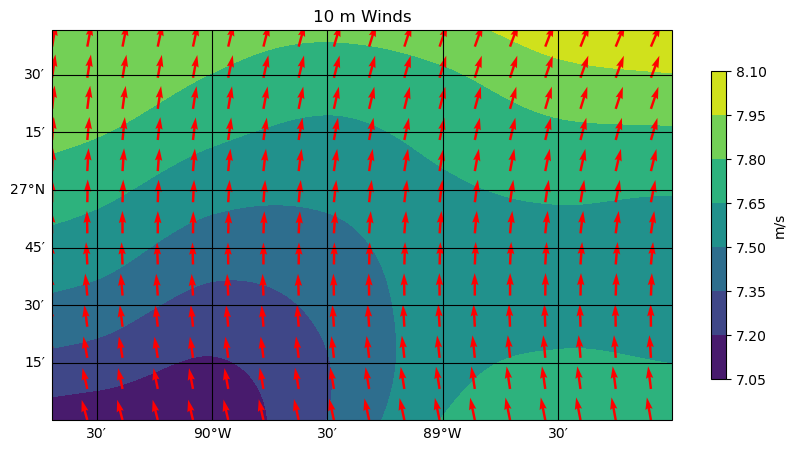

In [22]:
#Plot 10m wind speed & vectors 
mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
PCM=ax.get_children()[2]

cs = ax.contourf(new_lon, new_lat, new_cur_speed10_6)
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')

xlon2D, xlat2D = np.meshgrid(new_lon, new_lat)
skip = (slice(None, None, 15), slice(None, None, 15))
plt.quiver(xlon2D[skip], xlat2D[skip], new_cur_u10_6[skip], new_cur_v10_6[skip], color = 'red')

plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
gl.top_labels = False
gl.ylabels_right = False
plt.title('10 m Winds')
save_results_to = '/Users/Anna/Desktop/WRF/WeatherSummary/'
plt.savefig(save_results_to + '10mWinds_SmallGrid.png', bbox_inches = 'tight',dpi = 150)
plt.show()


In [ ]:
#winds at PBLH
uwind6_pblh = interplevel(new_uwind_6, new_height_agl6, new_pblh_6)
vwind6_pblh = interplevel(new_vwind_6, new_height_agl6, new_pblh_6)
wspeed6_pblh = interplevel(new_wspeed_6, new_height_agl6, new_pblh_6)


#winds at free atmo 


#EXAMPLE
#from netCDF4 import Dataset
#from wrf import getvar, interplevel

#wrfin = Dataset("wrfout_d02_2010-06-13_21:00:00")
#rh = getvar(wrfin, "rh")
#height = getvar(wrfin, "height_agl")
#pblh = getvar(wrfin, "PBLH")
#rh_pblh = interplevel(rh, height, pblh)

In [ ]:
#winds x 2 cross section



In [ ]:
#theta @ sfc
theta6_sfc = new_theta_6[0,:,:]

#theta @ PBLH
theta6_pblh = interplevel(new_theta_6, new_height_agl6, new_pblh_6)

#theta @ free atmo 


In [ ]:
#theta x 2 cross section



In [ ]:
#temp @ sfc
temp6_sfc = new_temp_6[0,:,:]

#temp @ PBLH
temp6_pblh = interplevel(new_temp_6, new_height_agl6, new_pblh_6)

#temp @ free atmo 


In [ ]:
#temp x 2 cross section



In [ ]:
#tv @ sfc
tv6_sfc = new_tv_6[0,:,:]

#tv @ PBLH
tv6_pblh = interplevel(new_tv_6, new_height_agl6, new_pblh_6)

#tv @ free atmo 



In [ ]:
#tv x 2 cross section



In [ ]:
#qv @ sfc
qv6_sfc = new_qv_6[0,:,:]

#qv @ PBLH
qv6_pblh = interplevel(new_qv_6, new_height_agl6, new_pblh_6)

#qv @ free atmo 



In [ ]:
#qv x 2 cross section



In [ ]:
#w @ PBLH
w6_pblh = interplevel(new_w_6, new_height_agl6, new_pblh_6)

#w @ free atmo 



In [ ]:
#w x 2 cross section

theta shape:  (99, 474, 639)
CoordPair(x=293.0, y=235.0)
(None, None)


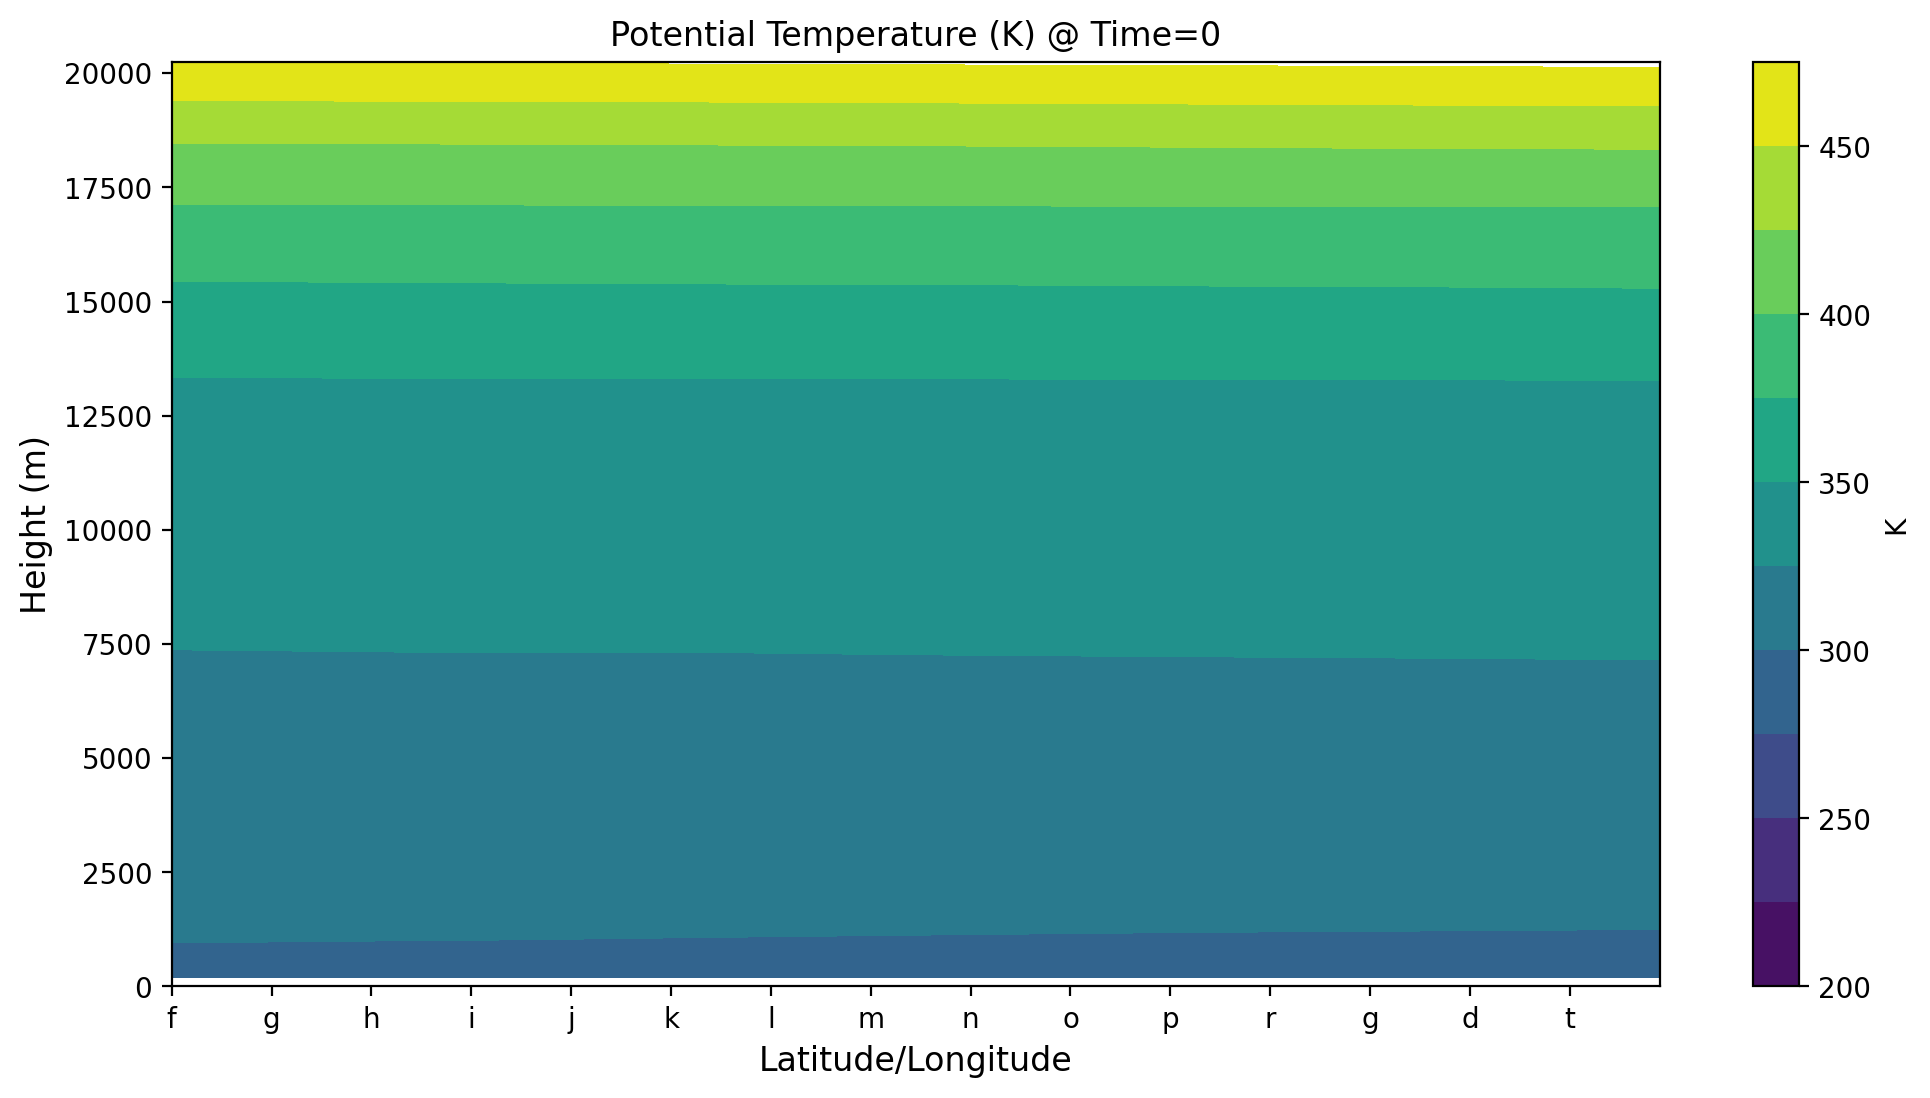

In [61]:

#p = getvar(ncfile, "pressure")
#wspd =  getvar(ncfile, "uvmet_wspd_wdir", units="kt")[0,:]
#theta = getvar(ncfile, "theta", units="K")
z = getvar(cur_wrfout6, "z")

#wspd =  getvar(ncfile, "uvmet_wspd_wdir", units="kt")[0,:]
theta = getvar(cur_wrfout6, "theta", units="K")
#pblh = getvar(wrfout6, "PBLH")
print('theta shape: ', theta.shape)
#print('pblh shape: ',pblh.shape)

#start_point = CoordPair(lat=32.5, lon=-84.0)
#end_point = CoordPair(lat=28.0, lon=-78.5)
start_point = CoordPair(lat=26.5, lon=-90.5)
end_point = CoordPair(lat=26.5, lon=-87.5)

#wspd_cross = vertcross(wspd, p, wrfin=ncfile, start_point=start_point,
#                       end_point=end_point, latlon=True, meta=True)
#theta_cross = vertcross(theta, p, wrfin=ncfile, start_point=start_point,
#                       end_point=end_point, latlon=False, meta=True)

theta_cross = vertcross(theta, z, wrfin=cur_wrfout6, start_point=start_point,
                       end_point=end_point, latlon=False, meta=True)
#pblh_cross = vertcross(pblh, z, wrfin=wrfout6, start_point=start_point,
#                       end_point=end_point, latlon=False, meta=True)
fig = plt.figure(figsize=(12,6), dpi=200.)
ax = plt.axes()

#coord_pairs = to_np(wspd_cross.coords["xy_loc"])
#theta_contours = ax.contour(np.arange(coord_pairs.shape[0]),to_np(theta_cross["vertical"]),
#                           to_np(theta_cross),np.arange(270.,400.,10.),colors='black',
#                           linestyles='dashed')

coord_pairs = to_np(theta_cross.coords["xy_loc"])
theta_contours = ax.contourf(np.arange(coord_pairs.shape[0]),to_np(theta_cross["vertical"]),
                           to_np(theta_cross),np.arange(200.,500.,25.),cmap=get_cmap("viridis"))
#pblh_contours = ax.contour(np.arange(coord_pairs.shape[0]),to_np(pblh_cross["vertical"]),
#                           to_np(pblh_cross),np.arange(200.,24000.,10.),colors='black',
#                           linestyles='dashed')

#plt.clabel(theta_contours, inline=1, fontsize=12, fmt="%i")
plt.colorbar(theta_contours, ax=ax, label = 'K')

#DEFAULT 
x_ticks = np.arange(coord_pairs.shape[0])

#x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}")
#            for pair in to_np(coord_pairs)]
#ax.set_xticks(x_ticks[::20])
#ax.set_xticklabels(x_labels[::20], rotation=45, fontsize=10)

#Axes.set_xticks(ticks, labels=None, *, minor=False, **kwargs)


# convert to lat lon
print(coord_pairs[0])
plot_latlon = wrf.pairs_to_latlon(coord_pairs[0])
print(plot_latlon)

#get every 20th

ax.set_xticks(ticks=x_ticks[0::20], labels=['f','g','h','i','j','k','l','m','n','o','p','r','g','d','t'], minor=False)
#1.from coord pair, grab every 20th --> in loop, steps 2-4 inside loop
for x in coord_pairs[0::20]:
    
#2. convert those to lat/lon
#3.take lat lon and cast as string
#4.append the strings to an array
#5. use this new array for labels 



#ax.set_yscale('symlog')
#ax.yaxis.set_major_formatter(ScalarFormatter())
#ax.set_yticks(np.linspace(200, 20000, 1000))
#ax.set_ylim(200, 20000)

# Set the x-axis and  y-axis labels
ax.set_xlabel("Latitude/Longitude", fontsize=12)
ax.set_ylabel("Height (m)", fontsize=12)

plt.title("Potential Temperature (K) @ Time=0")
plt.show()

In [ ]:
# vert cross sections: w



In [ ]:
# vert cross sections: qv



In [ ]:
# vert cross sections: lhf,


In [ ]:
# vert cross sections: shf


In [ ]:
# vert cross sections:  mom. flux 


In [ ]:
# vert cross sections:  wind speed
